# Exploratory Data Analysis - Terrorism

## By -  Mohamed Ashraf Ali K
## GRIP @ The Sparks Foundation

# Importing Libraries and Dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('4.csv',encoding='latin1')

C:\Users\91989\AppData\Local\Temp\ipykernel_18096\866928933.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('4.csv',encoding='latin1')


In [6]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Selecting a Subset of the Total Features

In [7]:
data = df[['country_txt','iyear','targtype1_txt','attacktype1_txt',
         'weaptype1_txt','ransom','property','success']]

## Drop NaN Values and show Dataframe

In [8]:
data.dropna()
data.head(5)

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success
0,Dominican Republic,1970,Private Citizens & Property,Assassination,Unknown,0.0,0,1
1,Mexico,1970,Government (Diplomatic),Hostage Taking (Kidnapping),Unknown,1.0,0,1
2,Philippines,1970,Journalists & Media,Assassination,Unknown,0.0,0,1
3,Greece,1970,Government (Diplomatic),Bombing/Explosion,Explosives,0.0,1,1
4,Japan,1970,Government (Diplomatic),Facility/Infrastructure Attack,Incendiary,0.0,1,1


## Check for any Duplicates

In [9]:
data.loc[data.duplicated()]

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success
11,United States,1970,Military,Facility/Infrastructure Attack,Incendiary,0.0,1,1
13,United States,1970,Government (General),Facility/Infrastructure Attack,Incendiary,0.0,1,1
19,United States,1970,Business,Facility/Infrastructure Attack,Incendiary,0.0,1,1
22,United States,1970,Educational Institution,Bombing/Explosion,Explosives,0.0,1,1
23,United States,1970,Military,Bombing/Explosion,Explosives,0.0,0,0
...,...,...,...,...,...,...,...,...
181685,Afghanistan,2017,Business,Bombing/Explosion,Explosives,NaN,1,1
181686,Somalia,2017,Military,Armed Assault,Firearms,NaN,-9,1
181687,Syria,2017,Military,Bombing/Explosion,Explosives,NaN,1,1
181688,Philippines,2017,Private Citizens & Property,Facility/Infrastructure Attack,Incendiary,NaN,1,1


##  Drop Duplicates

In [10]:
data = data.drop_duplicates()
data.loc[data.duplicated()]

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success


##  Miscellaneous Data Cleaning

In [11]:
data['ransom'].value_counts()

 0.0    26866
 1.0      969
-9.0      881
Name: ransom, dtype: int64

In [9]:
data = data.drop(data.query('ransom == -9').index)
data.head()

,country_txt,iyear,targtype1_txt,attacktype1_txt,weaptype1_txt,ransom,property,success
0,Dominican Republic,1970,Private Citizens & Property,Assassination,Unknown,0.0,0,1
1,Mexico,1970,Government (Diplomatic),Hostage Taking (Kidnapping),Unknown,1.0,0,1
2,Philippines,1970,Journalists & Media,Assassination,Unknown,0.0,0,1
3,Greece,1970,Government (Diplomatic),Bombing/Explosion,Explosives,0.0,1,1
4,Japan,1970,Government (Diplomatic),Facility/Infrastructure Attack,Incendiary,0.0,1,1


In [12]:
data['ransom'].value_counts()

 0.0    26866
 1.0      969
-9.0      881
Name: ransom, dtype: int64

#  Attack Frequency vs Years

[Text(0.5, 1.0, 'Total Attack Distribution ')]

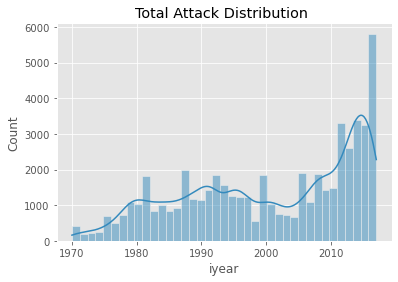

In [13]:
sns.histplot(data = data['iyear'], kde = True).set( title="Total Attack Distribution ") 

## Successful Attack Frequency Distirbution

[Text(0.5, 1.0, 'Total Success Distribution ')]

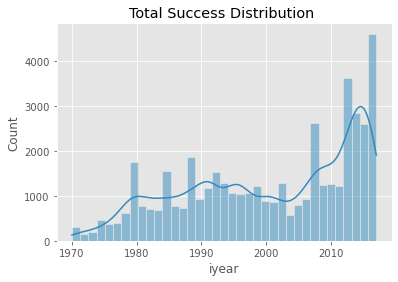

In [14]:
d = data.query('success == 1')
sns.histplot(data = d['iyear'], kde = True).set( title="Total Success Distribution ") 

In [16]:
(d['attacktype1_txt'].value_counts())

Bombing/Explosion                      14908
Armed Assault                          11118
Assassination                           5884
Hostage Taking (Kidnapping)             5732
Facility/Infrastructure Attack          4086
Unknown                                 2535
Hostage Taking (Barricade Incident)      720
Unarmed Assault                          604
Hijacking                                523
Name: attacktype1_txt, dtype: int64

In [17]:
(d['attacktype1_txt'].value_counts())*100/(data['attacktype1_txt'].value_counts())

Bombing/Explosion                      79.987123
Armed Assault                          90.766593
Assassination                          66.871235
Hostage Taking (Kidnapping)            95.933054
Facility/Infrastructure Attack         90.901001
Unknown                                85.439838
Hostage Taking (Barricade Incident)    98.901099
Unarmed Assault                        87.031700
Hijacking                              87.166667
Name: attacktype1_txt, dtype: float64

In [18]:
(d['country_txt'].value_counts())*100/(data['country_txt'].value_counts())

Afghanistan     85.153215
Albania         76.271186
Algeria         88.809311
Andorra        100.000000
Angola          94.758065
                  ...    
Yemen           78.141136
Yugoslavia      85.156250
Zaire           92.500000
Zambia          90.697674
Zimbabwe        94.186047
Name: country_txt, Length: 205, dtype: float64

##  Unsuccessful Attack Frequency Distirbution

[Text(0.5, 1.0, 'Total Failure Distribution ')]

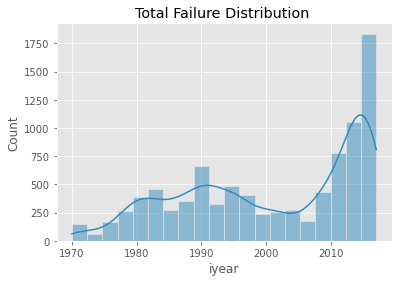

In [19]:
d = data.query('success == 0')
sns.histplot(data = d['iyear'], kde = True).set( title="Total Failure Distribution ") 

In [20]:
(d['attacktype1_txt'].value_counts())*100/(data['attacktype1_txt'].value_counts())

Armed Assault                           9.233407
Assassination                          33.128765
Bombing/Explosion                      20.012877
Facility/Infrastructure Attack          9.098999
Hijacking                              12.833333
Hostage Taking (Barricade Incident)     1.098901
Hostage Taking (Kidnapping)             4.066946
Unarmed Assault                        12.968300
Unknown                                14.560162
Name: attacktype1_txt, dtype: float64

In [21]:
(d['country_txt'].value_counts())*100/(data['country_txt'].value_counts())

Afghanistan    14.846785
Albania        23.728814
Algeria        11.190689
Andorra              NaN
Angola          5.241935
                 ...    
Yemen          21.858864
Yugoslavia     14.843750
Zaire           7.500000
Zambia          9.302326
Zimbabwe        5.813953
Name: country_txt, Length: 205, dtype: float64

# Major Terrorist Target Types

##  Targets Before the Year 2000

In [22]:
d = data.query('iyear < 2000')
d['targtype1_txt'].value_counts()*100/data['targtype1_txt'].value_counts()

Abortion Related                  78.787879
Airports & Aircraft               72.787821
Business                          54.719119
Educational Institution           40.948943
Food or Water Supply              47.389558
Government (Diplomatic)           64.238135
Government (General)              46.217314
Journalists & Media               49.824032
Maritime                          57.491289
Military                          39.878578
NGO                               32.603093
Other                             15.384615
Police                            39.440244
Private Citizens & Property       39.212211
Religious Figures/Institutions    36.828194
Telecommunication                 46.855984
Terrorists/Non-State Militia      33.883648
Tourists                          58.448753
Transportation                    52.957861
Unknown                           32.954545
Utilities                         49.446809
Violent Political Party           40.852391
Name: targtype1_txt, dtype: floa

## Targets After the Year 2000

In [23]:
d = data.query('iyear > 2000')
d['targtype1_txt'].value_counts()*100/data['targtype1_txt'].value_counts()

Abortion Related                  17.171717
Airports & Aircraft               25.880114
Business                          43.904808
Educational Institution           58.174317
Food or Water Supply              51.807229
Government (Diplomatic)           33.930058
Government (General)              51.650165
Journalists & Media               48.366013
Maritime                          41.114983
Military                          58.265395
NGO                               65.463918
Other                             84.615385
Police                            59.031687
Private Citizens & Property       58.089611
Religious Figures/Institutions    61.057269
Telecommunication                 51.724138
Terrorists/Non-State Militia      65.487421
Tourists                          38.504155
Transportation                    45.542950
Unknown                           66.193182
Utilities                         49.617021
Violent Political Party           58.004158
Name: targtype1_txt, dtype: floa

## Thus I have successfully Performed Exploratory Data Analytics on Global Terrorism Dataset